In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [122]:
houseDF = pd.read_csv('../data/HousingData.csv')
houseDF.head()
houseDF.dropna(inplace=True)

In [123]:
featureDF = houseDF[houseDF.columns[:-1]]
targetSR = houseDF[houseDF.columns[-1]]

In [124]:
xtrain, xtest, ytrain, ytest = train_test_split(featureDF, targetSR, test_size=0.2, random_state=7)

In [125]:
pipeline = make_pipeline(StandardScaler(),PCA())
xtrain = pipeline.fit_transform(xtrain)
model_tree  = DecisionTreeRegressor()

In [126]:
model_tree.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [127]:
# 주성분 분석 -> 타겟 클래스 예측에 중요한 피쳐 없다. -> 그나마 CRIM, INDUS
pd.Series(model_tree.feature_importances_,index=houseDF.columns[:-1])

CRIM       0.401107
ZN         0.002687
INDUS      0.306229
CHAS       0.047077
NOX        0.054943
RM         0.010941
AGE        0.025919
DIS        0.006120
RAD        0.007657
TAX        0.030771
PTRATIO    0.012496
B          0.014079
LSTAT      0.079974
dtype: float64

결정경계선 그리기

Text(0.5, 1.0, '[decision boundary]')

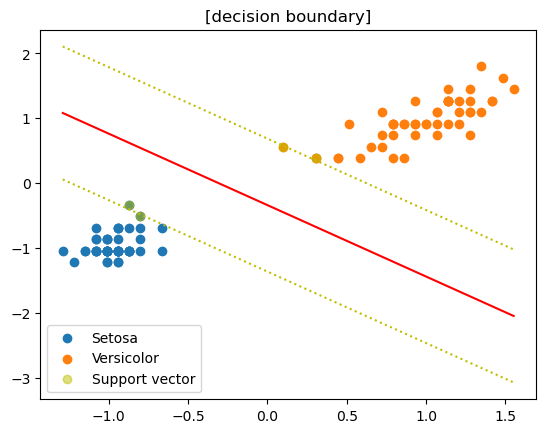

In [129]:
irisDF = pd.read_csv('../data/iris.csv')

irisDF = irisDF.iloc[:100]

targetSR = irisDF['variety']
featureDF = irisDF[irisDF.columns[2:-1]]

# 인코딩
encoder = LabelEncoder()
encoder.fit_transform(targetSR)

# 스케일링
scaler = StandardScaler()
featureDF = scaler.fit_transform(featureDF)

# x_data : petal.length / y_data : petal.width
x_data = featureDF.T[0]
y_data = featureDF.T[1]

# 모델 학습
model = SVC(kernel='linear', probability=True)
model.fit(featureDF,targetSR)

# 결정경계선 그리기

# 식 : ax+by+c = 0 --> y = -a/b * x_data - c/b
a = model.coef_.T[0]
b = model.coef_.T[1]
c = model.intercept_

y = -a/b*x_data - c/b

margin = 1 / np.sqrt(a**2 + b**2)

# Setosa
plt.scatter(x_data[:50],y_data[:50], label = 'Setosa')
# Versicolor
plt.scatter(x_data[50:],y_data[50:], label = 'Versicolor')
plt.legend()

# 결정 경계선
xx = [min(x_data), max(x_data)]
yy = (-a/b*xx - c/b)
plt.plot(xx,yy, 'r-')

# 결정 경계선 위 아래
yy_down = yy - np.sqrt(1+a**2)*margin
yy_up = yy + np.sqrt(1+a**2)*margin
plt.plot(xx,yy_down,'y:')
plt.plot(xx,yy_up,'y:')

# 서포트 벡터
sv_x = model.support_vectors_.T[0]
sv_y = model.support_vectors_.T[1]
plt.plot(sv_x, sv_y, 'yo', alpha = 0.5,label = 'Support vector')
plt.legend()
plt.title('[decision boundary]')